In [ ]:
import numpy as np
import cv2
from tqdm import tqdm
from pprint import pprint

def load_depth_image(image_path):
    # Load standard image format (e.g., PNG, JPG)
    depth_array = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # Convert to float32 for consistency
    depth_array = np.float32(depth_array)

    return depth_array

import os

def get_immediate_subfolders(path):
    try:
        return [f.path for f in os.scandir(path) if f.is_dir()]
    except FileNotFoundError:
        print(f"Path not found: {path}")
        return []
    except PermissionError:
        print(f"Permission denied: {path}")
        return []

#pprint(get_immediate_subfolders('/mnt/Velocity_Vault/Autofocus/Train/train1/merged_depth'))

['/mnt/Velocity_Vault/Autofocus/Train/train1/merged_depth/books_0',
 '/mnt/Velocity_Vault/Autofocus/Train/train1/merged_depth/apt1_0',
 '/mnt/Velocity_Vault/Autofocus/Train/train1/merged_depth/apt1_1',
 '/mnt/Velocity_Vault/Autofocus/Train/train1/merged_depth/apt1_2',
 '/mnt/Velocity_Vault/Autofocus/Train/train1/merged_depth/apt1_3',
 '/mnt/Velocity_Vault/Autofocus/Train/train1/merged_depth/apt1_4',
 '/mnt/Velocity_Vault/Autofocus/Train/train1/merged_depth/apt1_5',
 '/mnt/Velocity_Vault/Autofocus/Train/train1/merged_depth/apt1_6',
 '/mnt/Velocity_Vault/Autofocus/Train/train1/merged_depth/apt1_7',
 '/mnt/Velocity_Vault/Autofocus/Train/train1/merged_depth/apt1_8',
 '/mnt/Velocity_Vault/Autofocus/Train/train1/merged_depth/apt1_9',
 '/mnt/Velocity_Vault/Autofocus/Train/train1/merged_depth/apt2_0',
 '/mnt/Velocity_Vault/Autofocus/Train/train1/merged_depth/apt2_1',
 '/mnt/Velocity_Vault/Autofocus/Train/train1/merged_depth/apt2_2',
 '/mnt/Velocity_Vault/Autofocus/Train/train1/merged_depth/apt

In [2]:
main_path='/mnt/Velocity_Vault/Autofocus/Train/'
depth_paths=[]

for tr in range(7):
    temp_path=get_immediate_subfolders(main_path+'train'+str(tr+1)+'/merged_depth')
    for temp in temp_path:
        path=temp+'/result_merged_depth_center.png'  
        depth_paths.append(path)

In [3]:
depth_values=[]

for path in tqdm(depth_paths):
    depth=load_depth_image(path)
    flat_depth=depth.flatten()
    depth_values+=flat_depth.tolist()
    
depth_values=np.array(depth_values)

pprint(depth_values.shape)
pprint(np.max(depth_values))
pprint(np.min(depth_values))

100%|██████████| 355/355 [00:01<00:00, 186.15it/s]


(67631760,)
255.0
0.0


In [4]:
def find_slice(desc_list, number):
    if not desc_list:
        raise ValueError("The list cannot be empty.")
    if not all(desc_list[i] >= desc_list[i + 1] for i in range(len(desc_list) - 1)):
        raise ValueError("The list must be in descending order.")
    
    closest_index = min(range(len(desc_list)), key=lambda i: abs(desc_list[i] - number))
    return closest_index


def predict_slice(depth):
    
    approx=depth/255.0

    max_val=3.9
    min_val=0.2

    metre=(max_val * min_val) / (max_val - (max_val - min_val) * approx)
    metre*=1000

    slice_focal_length=[3910.92,2289.27,1508.71,1185.83,935.91,801.09,700.37,605.39,546.23,486.87,447.99,407.40,379.91,350.41,329.95,307.54,291.72,274.13,261.53,247.35,237.08,225.41,216.88,207.10,198.18,191.60,183.96,178.29,171.69,165.57,160.99,155.61,150.59,146.81,142.35,138.98,134.99,131.23,127.69,124.99,121.77,118.73,116.40,113.63,110.99,108.47,106.54,104.23,102.01]

    slice_focus=find_slice(slice_focal_length,metre)
    
    return slice_focus

slice_indices=[]

for s in tqdm(depth_values):
    slice_indices.append(predict_slice(s))
    
slice_indices=np.array(slice_indices)
    
pprint(slice_indices.shape)
pprint(np.max(slice_indices))
pprint(np.min(slice_indices))

  0%|          | 0/67631760 [00:00<?, ?it/s]/tmp/ipykernel_1352601/2654649579.py:18: RuntimeWarning: invalid value encountered in scalar divide
  metre=(max_val * min_val) / (max_val - (max_val - min_val) * approx)
100%|██████████| 67631760/67631760 [07:04<00:00, 159273.08it/s]


(67631760,)
48
0


264186.5625


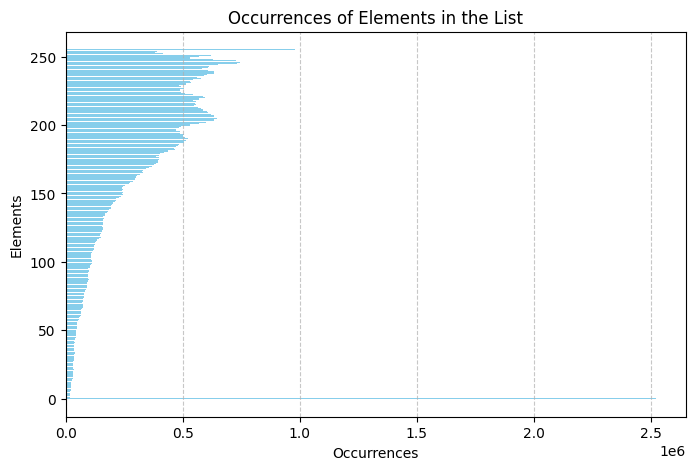

33815880.0


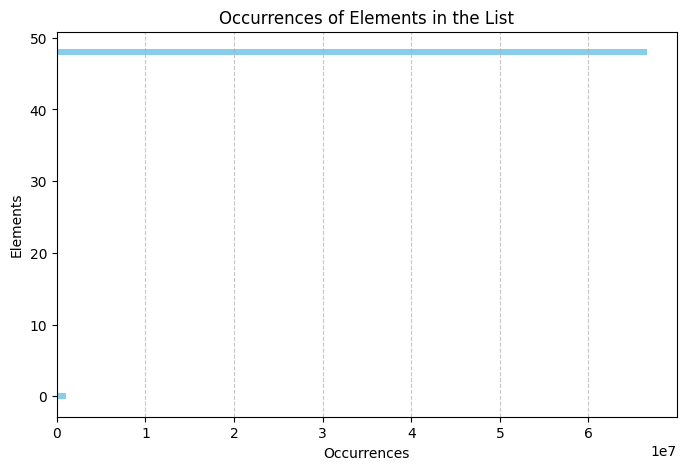

In [5]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

def plot_occurrences(numbers):
    # Count occurrences of each element
    occurrences = Counter(numbers)
    

    # Extract keys (unique numbers) and their corresponding values (counts)
    elements = list(occurrences.keys())
    counts = list(occurrences.values())
    print(np.mean(counts))

    # Plot a horizontal bar graph
    plt.figure(figsize=(8, 5))
    plt.barh(elements, counts, color="skyblue")
    plt.xlabel("Occurrences")
    plt.ylabel("Elements")
    plt.title("Occurrences of Elements in the List")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()
    
    
plot_occurrences(depth_values)
plot_occurrences(slice_indices)